# Análise dos sentidos da doutrinação e ideologia de gênero

## Material: notas taquigráficas da Comissão Escola sem Partido

## 1ª parte:

### Bibliotecas

In [8]:
import pdfplumber
import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import requests
import datetime
import csv
import sys
import re

import pandas as pd
import numpy as np
import string

from tqdm.auto import tqdm
import glob 
import os

### Obtenção dos pdfs

In [9]:
endereco = glob.glob(r'C:/Users/Andre G/Documents/Pesquisa/Fontes ESP/Projetos de Lei Doutrinação/Notas Taquigráficas/*.pdf')

### Qtd de arquivos analisados

In [10]:
len(endereco)

33

### Função para extrair e juntar o texto de várias páginas de um PDF


In [11]:
def extract_pdf(pdf_path):
    all_text = ''
    with pdfplumber.open(pdf_path) as pdf:
        #print(len(pdf.pages))
        total_.append(len(pdf.pages))
        for pdf_page in pdf.pages:
            single_page_text = pdf_page.extract_text()
            all_text = all_text + '\n' + single_page_text
    return all_text

## 2ª parte

### Conversão dos pdfs em texto

In [18]:
total_ = []
EMPILHADOS = []

for arquivo in tqdm(endereco):
    INDIVIDUAIS = []
    try:
        ## Cria uma variáve de data que está no fim do endereço do arquivo
        data = arquivo.split('\\')[-1].replace('.pdf','').replace('\uf02b','-')
        ## Extrai o texto do arquivo PDF e faz split para retirar o excesso de espaços e parágrafos.
        audiencia = extract_pdf(arquivo).split()
        texto_limpo = [palavra for palavra in audiencia] ## insert palavra.lower()
        ## Junta o texto
        tex = " ".join(item for item in texto_limpo)
        ## Variável ano vazia
        ano = ''
        ## limpeza dos dados
        text = tex.replace('CÂMARA DOS DEPUTADOS - DETAQ COM REDAÇÃO FINAL Comissão Especial - PL 7180/14 - Escola sem Partido Número: 0040/17 21/02/2017 ','').replace('CÂMARA DOS DEPUTADOS - DETAQ COM REDAÇÃO FINAL Comissão Especial - PL 7180/14 - Escola sem Partido Número: 0017/17 14/02/2017 ','').replace('CÂMARA DOS DEPUTADOS - DETAQ COM REDAÇÃO FINAL Comissão Especial - PL 7180/14 - Escola sem Partido Número: 0024/17 15/02/2017 ','').replace('CÂMARA DOS DEPUTADOS - DETAQ COM REDAÇÃO FINAL Comissão Especial - PL 7180/14 - Escola sem Partido Número: 0004/17 07/02/2017','').replace('CÂMARA DOS DEPUTADOS - DETAQ COM REDAÇÃO FINAL Comissão Especial - PL 7180/14 - Escola sem Partido Número: 0056/17 07/03/2017','')
        
        ## Salva arquivos individuais // NOTAS TAQUIGRAFICAS INDIVIDUAIS
        INDIVIDUAIS.append([data,ano,text])
        tab_ind = pd.DataFrame(INDIVIDUAIS,columns=['Data', 'Ano', 'Texto'])
        ## Converte as datas        
        tab_ind['Data'] = pd.to_datetime(tab_ind['Data'])
        tab_ind['Ano'] = tab_ind['Data'].dt.year
        tab_ind.sort_values('Data',inplace=True)
        ##Salva
        tab_ind.to_csv(r'./Texto das notas taquigráficas individuais/' + str(data) + '_texto_notas_taquigraficas.txt', sep=';', encoding='utf-8-sig')
        
        ## Salva tudo num único arquivo // NOTAS TAQUIGRAFICAS EMPILHADOS
        EMPILHADOS.append([data,ano,text])
        tab_todos = pd.DataFrame(EMPILHADOS,columns=['Data', 'Ano', 'Texto'])
        ## Converte as datas        
        tab_todos['Data'] = pd.to_datetime(tab_todos['Data'])
        tab_todos['Ano'] = tab_todos['Data'].dt.year
        tab_todos.sort_values('Data',inplace=True)
        ##Salva
        tab_todos.to_csv(r'./Texto das notas taquigráficas empilhados/texto_notas_taquigraficas.txt', sep=';', encoding='utf-8-sig')
        
    except Exception as e:
        print(e)
        break


print(f'\n')
print(f'Foram processados {len(total_)} arquivos no total.')
print(f'\n')
print(f'O número total de páginas analisadas foi {pd.DataFrame(total_).astype(int).sum()[0]}.')


  0%|          | 0/33 [00:00<?, ?it/s]



Foram processados 33 arquivos no total.


O número total de páginas analisadas foi 1141.


### Lista com todos os PDFs das audiências públicas e reuniões convertidos em texto

In [20]:
#lista todos
tab_todos

,Data,Ano,Texto
17,2017-02-14,2017,CÂMARA DOS DEPUTADOS DEPARTAMENTO DE TAQUIGRAF...
19,2017-02-15,2017,CÂMARA DOS DEPUTADOS DEPARTAMENTO DE TAQUIGRAF...
23,2017-02-21,2017,CÂMARA DOS DEPUTADOS DEPARTAMENTO DE TAQUIGRAF...
24,2017-03-21,2017,Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPU...
29,2017-03-28,2017,Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPU...
0,2017-04-04,2017,Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPU...
21,2017-04-18,2017,Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPU...
30,2017-05-30,2017,Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPU...
15,2017-06-13,2017,Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPU...
28,2017-06-27,2017,Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPU...


In [22]:
#lista individual
tab_ind

,Data,Ano,Texto
0,2018-10-31,2018,Reunião de: 31/10/2018 Notas Taquigráficas - C...


### Exemplo de saída do primeiro arquivo

In [23]:
EMPILHADOS[0]

['04-04-2017',
 '',
 'Discursos e Notas Taquigráﬁcas CÂMARA DOS DEPUTADOS - DETAQ Reunião: 0203/17 Hora: Data: idth=100%>DEPARTAMENTO DE TAQUIGRAFIA, REVISÃO E REDAÇÃO NÚCLEO DE REDAÇÃO FINAL EM COMISSÕES TEXTO COM REDAÇÃO FINAL Versão para registro histórico Não passível de alteração COMISSÃO ESPECIAL - PL 7180/14 - ESCOLA SEM PARTIDOEVENTO: Audiência Pública/Reunião Ordinária DeliberativaREUNIÃO Nº: 0203/17DATA: 04/04/2017LOCAL: Plenário 11 das ComissõesINÍCIO: 15h51minTÉRMINO: 18h35minPÁGINAS: 65 DEPOENTE/CONVIDADO - QUALIFICAÇÃO FÁBIO ARAGÃO - Procurador da República, titular do 1º Ofício da Tutela Coletiva da Educação no Rio de Janeiro e professor de Direito Constitucional AILTON BENEDITO - Procurador da República em Goiás, atuando na Procuradoria Regional dos Direitos do Cidadão e especialista em direito e gestão ambiental. SUMÁRIO Discussão acerca do PL nº 7.180/14. Deliberação de requerimento. OBSERVAÇÕES Há palavras ou expressões ininteligíveis. Houve intervenções ininteligíve

### Cria uma lista com os discursos de todos os deputados organizado por data

In [30]:
array_=[]
    
## Nome e discurso do ator
for i,j in zip(tab_todos.Texto, tab_todos.Data.dt.date):
    data = str(j)
    pattern2 = re.compile(r'[ O SR. | O SRA. ]([\s\S]*?)SR.|SRA',re.MULTILINE)
    dec2 = re.findall(pattern2,str(i))
    salva = pd.DataFrame(dec2, columns=['Discurso'])
    salva['Data'] = j
    salva['Ano'] = j.year
    salva.to_csv(r'./Listas com discursos/' + data + '_texto.csv', sep=';', encoding='utf-8-sig')
    
    array_.append(salva)
    discursos = pd.concat(array_, axis=0)
    discursos.to_csv(r'./Listas com discursos/discursos_texto.csv', sep=';', encoding='utf-8-sig')

### Exemplo de discursos após a extração individual

In [32]:
discursos

,Discurso,Data,Ano
0,"RA DOS DEPUTADOS DEPARTAMENTO DE TAQUIGRAFIA, ...",2017-02-14,2017
1,PRESIDENTE (Deputado Marcos Rogério) - Boa tar...,2017-02-14,2017
2,DEPUTADO PASTOR EURICO - Sr. Presidente! O,2017-02-14,2017
3,PRESIDENTE (Deputado Marcos Rogério) - Concedo...,2017-02-14,2017
4,"DEPUTADO PASTOR EURICO - A título de sugestão,...",2017-02-14,2017
...,...,...,...
886,PR. MARCO FELICIANO (PODE - SP) - Sr. Presiden...,2018-11-22,2018
887,PRESIDENTE (Marcos Rogério. DEM - RO) - Agrade...,2018-11-22,2018
888,FLAVINHO (PSC - SP) - Eu tenho plena certeza d...,2018-11-22,2018
889,PRESIDENTE (Marcos Rogério. DEM - RO) - Esta P...,2018-11-22,2018


### Reuniões realizadas por ano

<AxesSubplot:>

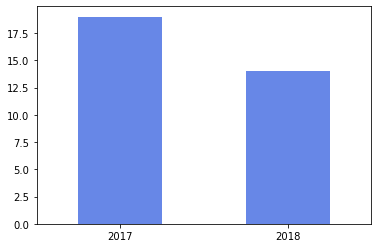

In [33]:
tab_todos.Ano.value_counts().plot.bar(color='royalblue',alpha=0.8, rot=0)

### Quantidade de falas mapeadas

In [34]:
print(f'\n')
print(f'As reuniões da Comissão do ESP geraram {discursos.shape[0]} intervenções no total.')
print(f'\n')



As reuniões da Comissão do ESP geraram 5508 intervenções no total.




### Falas por ano

<AxesSubplot:>

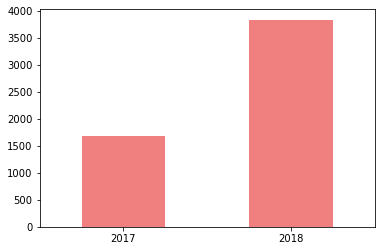

In [35]:
discursos.Ano.value_counts().sort_index().plot.bar(color='lightcoral',rot=0)

In [36]:
discursos[discursos['Ano']==2018].Data.value_counts().sort_index(ascending=True).agg(['min', 'max', 'mean','std', 'median'])

min         1.000000
max       891.000000
mean      273.714286
std       278.280553
median    195.000000
Name: Data, dtype: float64

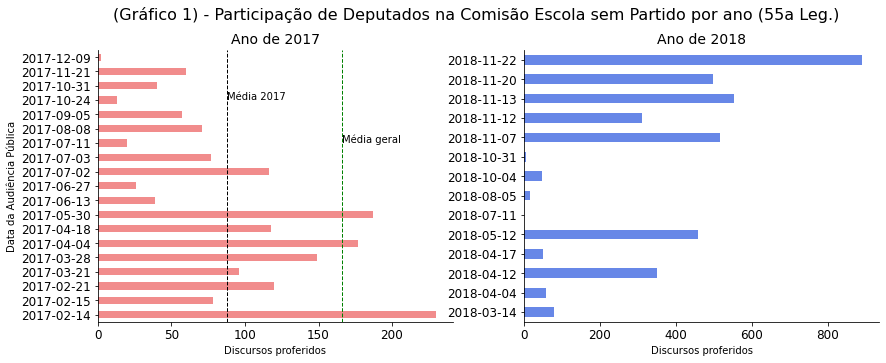

In [37]:
fig, axarr = plt.subplots(1, 2, figsize=(14,5))

fig.suptitle('(Gráfico 1) - Participação de Deputados na Comisão Escola sem Partido por ano (55a Leg.)',fontsize=16,y=1.)

discursos[discursos['Ano']==2017].Data.value_counts().sort_index(ascending=True).plot.barh(
    ax=axarr[0],fontsize=12,color="lightcoral",alpha=0.9
)
axarr[0].set_title("Ano de 2017", fontsize=14)
axarr[0].set_xlabel("Discursos proferidos")
axarr[0].set_ylabel("Data da Audiência Pública")
axarr[0].grid(False)
axarr[0].set_facecolor('w')
axarr[0].axvline(88, color='k', linestyle='dashed', linewidth=1)
axarr[0].axvline(166, color='g', linestyle='dashed', linewidth=1)
axarr[0].text(88,15, 'Média 2017')
axarr[0].text(166,12, 'Média geral')


discursos[discursos['Ano']==2018].Data.value_counts().sort_index(ascending=True).plot.barh(
    ax=axarr[1],fontsize=12,color="royalblue",alpha=0.8
)
axarr[1].set_title("Ano de 2018", fontsize=14)
axarr[1].set_xlabel("Discursos proferidos")
axarr[1].grid(False)
axarr[1].set_facecolor('w')


plt.subplots_adjust(hspace=2)

import seaborn as sns
sns.despine()

plt.savefig('Participação_ESP_Data_Debate.png', bbox_inches="tight")

### Insere coluna com os nomes dos deputados

In [41]:
## Importa arquivo classificado
clas = pd.read_csv(r'./Listas com discursos/discursos_texto_class.csv', sep=';',index_col=0, header=0, encoding='utf-8-sig')

In [42]:
clas.tail(3)

,Discurso,Data,Ano,tipo
888,FLAVINHO (PSC - SP) - Eu tenho plena certeza d...,22/11/2018,2018,2
889,PRESIDENTE (Marcos Rogério. DEM - RO) - Esta P...,22/11/2018,2018,2
890,SÓSTENES CAVALCANTE (DEM - RJ) - Sr. President...,22/11/2018,2018,2


In [43]:
## cria a variável e salva os valores
clas['Ator'] = [re.split('-', i, 1)[0] for i in clas.Discurso]

In [44]:
## Cria variável de nomes para manipulação
clas['Nome'] = clas.Ator

In [45]:
## Faz o tratamento dos dados, substituíndo valores
clas['Nome'] = [i.replace('PRESIDENTE ','').replace('PRESIIDENTE ','').replace('DEPUTADO ','').replace('DEPUTADA ','').replace('Deputado ','').replace('Deputada ','').replace('(','').replace(')','').title().strip().replace('Thomas Guilliano','Thomas Giulliano').replace('João Luiz Cesarino Rosa','João Luiz Cesarino Da Rosa').replace('. Dem','').replace(' Pcdob','').replace(' Pt','').replace(' Psc','').replace(' Psdb','').replace(' Pode','').replace(' Psol','').replace(' Prb','').replace(' Pr','').replace(' Bloco/Pp','').replace('. Patri','').replace(' Psb','').replace(' Pdt','').replace(' Dem','').replace(' Patri','').replace(' Psd','').replace(' Bloco/Ptb','').replace(' Bloco/Pode','').replace(' Psl','').replace('a.','a').replace('y.','y').replace('l.','l').replace('Deputadaofessora Marcivania','Deputada Professora Marcivania') for i in clas['Nome']]

In [46]:
## Variavel nome aplicar Title()
clas.Nome = [i.strip().title() for i in clas.Nome]

In [47]:
## Deletar células com valor == zero, que referem-se a informação sobre as reuniões.
clas = clas.drop(labels=0, axis=0)

In [48]:
## Remover o Index do banco
#clas.reset_index()

### Exemplo da saída após a filtragem

In [50]:
clas.head()

,Discurso,Data,Ano,tipo,Ator,Nome
1,PRESIDENTE (Deputado Marcos Rogério) - Boa tar...,14/02/2017,2017,1,PRESIDENTE (Deputado Marcos Rogério),Marcos Rogério
2,DEPUTADO PASTOR EURICO - Sr. Presidente! O,14/02/2017,2017,1,DEPUTADO PASTOR EURICO,Pastor Eurico
3,PRESIDENTE (Deputado Marcos Rogério) - Concedo...,14/02/2017,2017,1,PRESIDENTE (Deputado Marcos Rogério),Marcos Rogério
4,"DEPUTADO PASTOR EURICO - A título de sugestão,...",14/02/2017,2017,1,DEPUTADO PASTOR EURICO,Pastor Eurico
5,PRESIDENTE (Deputado Marcos Rogério) - Agradeç...,14/02/2017,2017,1,PRESIDENTE (Deputado Marcos Rogério),Marcos Rogério


### Coluna Discurso sem os dados do ator

In [51]:
## filtragem do tipo 1
clas['DiscursoLimpo'] = [re.split('-', i, 1)[1] for i in clas.Discurso]

In [52]:
## filtragem do tipo 2
banco_tipo2 = clas[clas['tipo']==2]

## salva valores já filtrados
banco_tipo2['DiscursoLimpo'] = [re.split('\)\ - ', i, 1)[1] for i in banco_tipo2['Discurso']]

C:\Users\ANDREG~1\AppData\Local\Temp/ipykernel_6108/3658036674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco_tipo2['DiscursoLimpo'] = [re.split('\)\ - ', i, 1)[1] for i in banco_tipo2['Discurso']]


### Contatena banco tipo 2 com o banco geral

In [53]:
# concat
banco_merged = pd.concat([clas[clas['tipo']==1],banco_tipo2], axis=0)

In [54]:
## junta os bancos e usa as colunas filtradas
banco_merged_filtrado = banco_merged[['Data', 'Ano', 'Nome', 'DiscursoLimpo']]
banco_merged_filtrado.shape

(5475, 4)

### Junta banco de falas com o banco dos integrantes do ESP por religião e partido

In [56]:
rel = pd.read_csv(r'./Lista deputados religiosos do ESP/esp_partidos.csv', sep=';', header=0, encoding='cp1252')

In [58]:
rel.head()

,deputadoid,ESP,dataEntrada,dataSaida,ano,condicaoMembro,Parlamentar,Denominação,author1_party_abr,author1_state,rel
0,178836,1.0,05/10/2016,31/12/2018,2016.0,Titular,Alan Rick,Batista,PRB,AC,ev
1,74057,1.0,03/07/2018,31/12/2018,2018.0,Suplente,ALICE PORTUGAL,NaN,PCdoB,BA,nd
2,141383,1.0,05/10/2016,31/12/2018,2016.0,Titular,ANTONIO BULHÕES,IURD,PRB,SP,ev
3,73434,1.0,05/10/2016,31/12/2018,2016.0,Suplente,ARNALDO FARIA DE SÁ,NaN,PTB,SP,nd
4,74459,1.0,15/02/2017,31/12/2018,2017.0,Suplente,ÁTILA LIRA,NaN,PSB,PI,nd


In [59]:
rel.columns = rel.columns.str.replace('Parlamentar', 'Nome')
rel.Nome = rel.Nome.astype(str)
rel.Nome = [i.strip().title() for i in rel.Nome]

In [60]:
## Merge bancos rel e banco_merged
merge_esp_rel = pd.merge(banco_merged_filtrado,rel, on='Nome', how='left')
merge_esp = pd.DataFrame(merge_esp_rel)

In [61]:
merge_esp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 0 to 5474
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               5474 non-null   object 
 1   Ano                5475 non-null   int64  
 2   Nome               5475 non-null   object 
 3   DiscursoLimpo      5475 non-null   object 
 4   deputadoid         5046 non-null   float64
 5   ESP                4963 non-null   float64
 6   dataEntrada        4963 non-null   object 
 7   dataSaida          4963 non-null   object 
 8   ano                4963 non-null   float64
 9   condicaoMembro     4963 non-null   object 
 10  Denominação        3043 non-null   object 
 11  author1_party_abr  5046 non-null   object 
 12  author1_state      5046 non-null   object 
 13  rel                5046 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 641.6+ KB


### Importa banco com o posicionamento pró e contra o ESP

In [63]:
pro_contra_esp = pd.read_csv(r'./Lista pros contras audiencias ESP/lista_pros_contras_audiencias_esp.csv', sep=';', header=0, encoding='cp1252')

In [64]:
pro_contra_esp.head(2)

,deputadoid,Nome,sit_opus
0,178836,Alan Rick,Pro-ESP
1,74057,Alice Portugal,Contra-ESP


In [65]:
merge_comissao = pd.merge(merge_esp, pro_contra_esp, on=['Nome'], how='left')
merge_esp_pro_contra = pd.DataFrame(merge_comissao)

In [66]:
## declara colunas int
merge_esp_pro_contra = merge_esp_pro_contra.fillna(0).astype({'ESP':int,'ano':int,'Ano':int,'deputadoid_x':int,'deputadoid_y':int})

## Exporta arquivos final para análise.

In [68]:
## Contra-ESP
contra_esp = merge_esp_pro_contra[merge_esp_pro_contra['sit_opus']=='Pro-ESP']
contra_esp.to_csv(r'./Banco Final/bancofinal_ContraESP.csv', sep=';', header=True, encoding='cp1252')

## Pró-ESP
pro_esp = merge_esp_pro_contra[merge_esp_pro_contra['sit_opus']=='Pro-ESP']
pro_esp.to_csv(r'./Banco Final/bancofinal_ProESP.csv', sep=';', header=True, encoding='cp1252')

## Geral
merge_esp_pro_contra.to_csv(r'./Banco Final/bancofinalcompleto.csv', sep=';', header=True, encoding='cp1252')

### Exemplo do arquivo final

In [70]:
merge_esp_pro_contra.head(5)

,Data,Ano,Nome,DiscursoLimpo,deputadoid_x,ESP,dataEntrada,dataSaida,ano,condicaoMembro,Denominação,author1_party_abr,author1_state,rel,deputadoid_y,sit_opus
0,14/02/2017,2017,Marcos Rogério,"Boa tarde a todos. Nos termos regimentais, de...",167722,1,05/10/2016,31/12/2018,2016,Titular,Assembleia de Deus,PDT,RO,ev,167722,Pro-ESP
1,14/02/2017,2017,Pastor Eurico,Sr. Presidente! O,160642,1,05/10/2016,31/12/2018,2016,Titular,Assembleia de Deus,PSB,PE,ev,160642,Pro-ESP
2,14/02/2017,2017,Marcos Rogério,Concedo a palavra ao Deputado Pastor Eurico. O,167722,1,05/10/2016,31/12/2018,2016,Titular,Assembleia de Deus,PDT,RO,ev,167722,Pro-ESP
3,14/02/2017,2017,Pastor Eurico,"A título de sugestão, que é importante para o...",160642,1,05/10/2016,31/12/2018,2016,Titular,Assembleia de Deus,PSB,PE,ev,160642,Pro-ESP
4,14/02/2017,2017,Marcos Rogério,Agradeço a V.Exa. a lembrança. Na sessão ante...,167722,1,05/10/2016,31/12/2018,2016,Titular,Assembleia de Deus,PDT,RO,ev,167722,Pro-ESP


In [78]:
print(f'\n')
print(f'**O banco final possui {merge_esp_pro_contra.shape[0]} linhas e {merge_esp_pro_contra.shape[1]} colunas')
print(f'\n')



**O banco final possui 5475 linhas e 16 colunas


